# MACHINE LEARNING MODEL -  IROHACK PROJECT 

### 📌 STEP 1: Load Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import yfinance as yf
from tabulate import tabulate
from datetime import date, timedelta
import os
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import tkinter as tk
from tkinter import messagebox
import joblib



## Machine Learning Model Creation

### 📌 STEP 1.1: Feature Engineering

In [2]:
import numpy as np

Final_Dataset = pd.read_csv(r"D:\Project\TradeVision\Data\Final Dataset\Final_Dataset.csv")

# Define the feature columns (excluding categorical columns like Date, Ticker, and Company)
feature_columns = [
    'Open_Price', 'High_Price', 'Low_Price', 'Close_Price', 'Volume',
    'Daily_Variation', 'Cumulative_Variation_10', 'MA_10days', 'MA_50days', 'MA_200days'
]

# Define the target variable
target_column = 'Trend_Label'

# Extract features (X) and target (y)
X = Final_Dataset[feature_columns].values  # Convert to NumPy array
y = Final_Dataset[target_column].values  # Convert to NumPy array

# Print shapes using tabulate
table = [["X shape", X.shape], ["y shape", y.shape]]
print(tabulate(table, headers=["Dataset", "Shape"], tablefmt="grid"))



+-----------+--------------+
| Dataset   | Shape        |
+===========+==============+
| X shape   | (249882, 10) |
+-----------+--------------+
| y shape   | (249882,)    |
+-----------+--------------+


### 📌 STEP 1.2: Time-Series Aware Train-Test Split Completed

In [4]:

# Load dataset
file_path = r"D:\Project\TradeVision\Data\Final Dataset\Final_Dataset_Features.csv"
Final_Dataset = pd.read_csv(file_path)

# Ensure the dataset is sorted by Date
Final_Dataset['Date'] = pd.to_datetime(Final_Dataset['Date'], errors='coerce')
Final_Dataset.sort_values(by=['Date', 'Ticker'], inplace=True)

# 📌 **1️⃣ Define Train, Validation, Test Split (Time-Series Aware)**
train_size = 0.7
val_size = 0.15  # 15% for validation
test_size = 0.15  # 15% for testing

# Get unique dates in order
unique_dates = Final_Dataset['Date'].unique()
num_dates = len(unique_dates)

# Compute split indices
train_end = int(train_size * num_dates)
val_end = int((train_size + val_size) * num_dates)

# Define train, validation, and test sets
train_dates = unique_dates[:train_end]
val_dates = unique_dates[train_end:val_end]
test_dates = unique_dates[val_end:]

train_data = Final_Dataset[Final_Dataset['Date'].isin(train_dates)]
val_data = Final_Dataset[Final_Dataset['Date'].isin(val_dates)]
test_data = Final_Dataset[Final_Dataset['Date'].isin(test_dates)]

# 📌 **Print dataset sizes in tabular format**
table_data = [
    ["Train Data", train_data.shape[0], train_data.shape[1]],
    ["Validation Data", val_data.shape[0], val_data.shape[1]],
    ["Test Data", test_data.shape[0], test_data.shape[1]],
]

print(tabulate(table_data, headers=["Dataset", "Rows", "Columns"], tablefmt="grid"))

# Save the datasets separately
train_data.to_csv(r"D:\Project\TradeVision\Data\Train_Dataset.csv", index=False)
val_data.to_csv(r"D:\Project\TradeVision\Data\Validation_Dataset.csv", index=False)
test_data.to_csv(r"D:\Project\TradeVision\Data\Test_Dataset.csv", index=False)

print("✅ Train, Validation, and Test splits are saved!")


+-----------------+--------+-----------+
| Dataset         |   Rows |   Columns |
+=================+========+===========+
| Train Data      | 167814 |        31 |
+-----------------+--------+-----------+
| Validation Data |  36380 |        31 |
+-----------------+--------+-----------+
| Test Data       |  45688 |        31 |
+-----------------+--------+-----------+
✅ Train, Validation, and Test splits are saved!


### 📌 STEP 1.3: Encoding the Target Variable (Trend_Label)

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import joblib  # To save the scaler and encoder
from tabulate import tabulate

# Load the train, validation, and test sets
train = pd.read_csv(r"D:\Project\TradeVision\Data\Splits\Validation_Dataset.csv")
val = pd.read_csv(r"D:\Project\TradeVision\Data\Splits\Train_Dataset.csv")
test = pd.read_csv(r"D:\Project\TradeVision\Data\Splits\Test_Dataset.csv")

# Identify numerical columns
numerical_features = train.select_dtypes(include=['number']).columns.tolist()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform only the numerical columns
train[numerical_features] = scaler.fit_transform(train[numerical_features])
val[numerical_features] = scaler.transform(val[numerical_features])
test[numerical_features] = scaler.transform(test[numerical_features])


# Save the scaler for later use
scaler_path = "D:/Project/TradeVision/Data/Scalers/minmax_scaler.pkl"
joblib.dump(scaler, scaler_path)

# Encode Trend_Label using Label Encoding
encoder = LabelEncoder()
train["Trend_Label"] = encoder.fit_transform(train["Trend_Label"])
val["Trend_Label"] = encoder.transform(val["Trend_Label"])
test["Trend_Label"] = encoder.transform(test["Trend_Label"])

# Save the encoder for later use
encoder_path = "D:/Project/TradeVision/Data/Scalers/label_encoder.pkl"
joblib.dump(encoder, encoder_path)

# Save the processed datasets
train.to_csv(r"D:\Project\TradeVision\Data\Splits\Validation_Dataset.csv", index=False)
val.to_csv(r"D:\Project\TradeVision\Data\Splits\Train_Dataset.csv", index=False)
test.to_csv(r"D:\Project\TradeVision\Data\Splits\Test_Dataset.csv", index=False)

# Print sample data using tabulate
print("\nSample Scaled & Encoded Train Data:")
print(tabulate(train.head(), headers='keys', tablefmt='grid'))

print("\nSample Scaled & Encoded Validation Data:")
print(tabulate(val.head(), headers='keys', tablefmt='grid'))

print("\nSample Scaled & Encoded Test Data:")
print(tabulate(test.head(), headers='keys', tablefmt='grid'))

print("✅ Feature scaling and encoding completed! Processed datasets saved.")


C:\Users\cleid\AppData\Local\Temp\ipykernel_20668\1381418077.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv(r"D:\Project\TradeVision\Data\Splits\Test_Dataset.csv")



Sample Scaled & Encoded Train Data:
+----+------------+----------+----------------------------+------------------------+---------------+--------------+--------------+-------------+---------------+-------------+-------------------+---------------------------+-------------+-------------+--------------+---------+--------------------+--------+-------------------+--------------------+---------------+-------------------+-------------------+--------------------+----------+-------------+---------------+------------------+----------------+-------------------+-------------------+
|    | Date       | Ticker   | Company                    | Sector                 | Country       |   Open_Price |   High_Price |   Low_Price |   Close_Price |      Volume |   Daily_Variation |   Cumulative_Variation_10 |   MA_10days |   MA_50days |   MA_200days | Month   |   Pct_Change_Month |   Year |   Pct_Change_Year |   Pct_Change_Daily |   Trend_Label |   Close_Price_t-1 |   Close_Price_t-5 |   Close_Price_t-10 

### 📌 STEP 1.4: Data Feature Normalization

In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib  # To save the scaler
from tabulate import tabulate

# Load the train, validation, and test sets
train = pd.read_csv(r"D:\Project\TradeVision\Data\Splits\Train_Dataset.csv")
val = pd.read_csv(r"D:\Project\TradeVision\Data\Splits\Validation_Dataset.csv")
test = pd.read_csv(r"D:\Project\TradeVision\Data\Splits\Test_Dataset.csv")

# Identify numerical columns
numerical_features = train.select_dtypes(include=['number']).columns.tolist()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform only the numerical columns
train[numerical_features] = scaler.fit_transform(train[numerical_features])
val[numerical_features] = scaler.transform(val[numerical_features])
test[numerical_features] = scaler.transform(test[numerical_features])

# Save the scaler for later use
scaler_path = "D:/Project/TradeVision/Data/Scalers/minmax_scaler.pkl"
joblib.dump(scaler, scaler_path)

# Save the normalized datasets
train.to_csv(r"D:\Project\TradeVision\Data\Splits\Train_Dataset.csv", index=False)
val.to_csv(r"D:\Project\TradeVision\Data\Splits\Validation_Dataset.csv", index=False)
test.to_csv(r"D:\Project\TradeVision\Data\Splits\Test_Dataset.csv", index=False)

# Print sample data using tabulate
print("\nSample Scaled Train Data:")
print(tabulate(train.head(), headers='keys', tablefmt='grid'))

print("\nSample Scaled Validation Data:")
print(tabulate(val.head(), headers='keys', tablefmt='grid'))

print("\nSample Scaled Test Data:")
print(tabulate(test.head(), headers='keys', tablefmt='grid'))

print("✅ Feature scaling completed! Scaled datasets saved.")


C:\Users\cleid\AppData\Local\Temp\ipykernel_23348\3865369082.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv(r"D:\Project\TradeVision\Data\Splits\Test_Dataset.csv")



Sample Scaled Train Data:
+----+------------+----------+----------------------------+------------------------+---------------+--------------+--------------+-------------+---------------+-------------+-------------------+---------------------------+-------------+-------------+--------------+---------+--------------------+--------+-------------------+--------------------+---------------+-------------------+-------------------+--------------------+----------+-------------+---------------+------------------+----------------+-------------------+-------------------+
|    | Date       | Ticker   | Company                    | Sector                 | Country       |   Open_Price |   High_Price |   Low_Price |   Close_Price |      Volume |   Daily_Variation |   Cumulative_Variation_10 |   MA_10days |   MA_50days |   MA_200days | Month   |   Pct_Change_Month |   Year |   Pct_Change_Year |   Pct_Change_Daily |   Trend_Label |   Close_Price_t-1 |   Close_Price_t-5 |   Close_Price_t-10 |   RSI_14

### 📌 STEP 1.5: Reshape Data for LSTM Input

In [6]:
import numpy as np
from tabulate import tabulate

# Define the time_steps (e.g., 10 previous days to predict the next day's value)
time_steps = 10

# Extract the feature columns (excluding categorical columns like Date, Ticker, and Company)
feature_columns = [
    'Open_Price', 'High_Price', 'Low_Price', 'Close_Price', 'Volume',
    'Daily_Variation', 'Cumulative_Variation_10', 'MA_10days', 'MA_50days', 'MA_200days'
]

# Function to reshape data into time-steps format
def reshape_data(data, time_steps, feature_columns):
    num_samples = len(data) - time_steps
    reshaped_data = np.zeros((num_samples, time_steps, len(feature_columns)))
    for i in range(time_steps, len(data)):
        reshaped_data[i - time_steps] = data[feature_columns].iloc[i-time_steps:i].values
    return reshaped_data

# Reshape the train, validation, and test datasets into 3D arrays: (samples, time_steps, features)
X_train_reshaped = reshape_data(train, time_steps, feature_columns)
X_val_reshaped = reshape_data(val, time_steps, feature_columns)
X_test_reshaped = reshape_data(test, time_steps, feature_columns)

# Print the shapes in a tabular format
shapes = [
    ["X_train_reshaped", X_train_reshaped.shape],
    ["X_val_reshaped", X_val_reshaped.shape],
    ["X_test_reshaped", X_test_reshaped.shape]
]

print(tabulate(shapes, headers=["Dataset", "Shape"], tablefmt="grid"))


+------------------+------------------+
| Dataset          | Shape            |
+==================+==================+
| X_train_reshaped | (36370, 10, 10)  |
+------------------+------------------+
| X_val_reshaped   | (167804, 10, 10) |
+------------------+------------------+
| X_test_reshaped  | (45678, 10, 10)  |
+------------------+------------------+


### 📌 STEP 1.6: Build for Long Time Short Memory (LSTM)

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the LSTM model for classification
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        
        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        
        # Fully connected output layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Pass input through LSTM
        out, (hn, cn) = self.lstm(x)
        
        # Use the last time step's output
        out = self.fc(out[:, -1, :])
        
        return out

# Model parameters
input_size = X_train_reshaped.shape[2]  # Number of features
hidden_size = 100  # Hidden units
num_layers = 2  # LSTM layers
output_size = 3  # Number of classes (Up, Down, Neutral)

# Initialize model
model = LSTMModel(input_size, hidden_size, num_layers, output_size)

# Print model summary
model_summary = [
    ["Layer", "Details"],
    ["LSTM Layer", f"Input size: {input_size}, Hidden size: {hidden_size}, Layers: {num_layers}"],
    ["Fully Connected Layer", f"Input features: {hidden_size}, Output features: {output_size}"]
]

from tabulate import tabulate
print(tabulate(model_summary, headers="firstrow", tablefmt="grid"))


+-----------------------+---------------------------------------------+
| Layer                 | Details                                     |
+=======================+=============================================+
| LSTM Layer            | Input size: 10, Hidden size: 100, Layers: 2 |
+-----------------------+---------------------------------------------+
| Fully Connected Layer | Input features: 100, Output features: 3     |
+-----------------------+---------------------------------------------+


### 📌 STEP 1.6: Handling Missing Values in Stock Market Dataset

In [8]:
# Forward fill for lagged close prices and percentage changes
cols_ffill = ['Pct_Change_Month', 'Pct_Change_Year', 'Pct_Change_Daily', 
              'Close_Price_t-1', 'Close_Price_t-5', 'Close_Price_t-10']
Final_Dataset[cols_ffill] = Final_Dataset[cols_ffill].ffill()

# Mean imputation for Bollinger_Lower and other single missing value columns
Final_Dataset['Bollinger_Lower'] = Final_Dataset['Bollinger_Lower'].fillna(Final_Dataset['Bollinger_Lower'].mean())

# Interpolation for `Daily_Variation` & `Cumulative_Variation_10`
Final_Dataset['Daily_Variation'] = Final_Dataset['Daily_Variation'].interpolate(method='linear')
Final_Dataset['Cumulative_Variation_10'] = Final_Dataset['Cumulative_Variation_10'].interpolate(method='linear')

# Forward fill the remaining missing values
Final_Dataset[['Pct_Change_Month', 'Close_Price_t-5', 'Close_Price_t-10']] = \
    Final_Dataset[['Pct_Change_Month', 'Close_Price_t-5', 'Close_Price_t-10']].ffill()

# Fill the last missing value in Bollinger_Upper with the column mean
Final_Dataset['Bollinger_Upper'] = Final_Dataset['Bollinger_Upper'].fillna(Final_Dataset['Bollinger_Upper'].mean())

# Verify again
print("Final missing values:\n", Final_Dataset.isna().sum())


# Verify if there are any remaining NaNs
missing_values_after = Final_Dataset.isna().sum()
print("Missing values after second imputation:\n", missing_values_after)


Final missing values:
 Date                       14896
Ticker                         0
Company                        0
Sector                         0
Country                        0
Open_Price                     0
High_Price                     0
Low_Price                      0
Close_Price                    0
Volume                         0
Daily_Variation               50
Cumulative_Variation_10       50
MA_10days                      0
MA_50days                      0
MA_200days                     0
Month                          0
Pct_Change_Month              50
Year                           0
Pct_Change_Year               50
Pct_Change_Daily              50
Trend_Label                    0
Close_Price_t-1                0
Close_Price_t-5                0
Close_Price_t-10             462
RSI_14                         0
MACD_Line                      0
MACD_Signal                    0
MACD_Histogram                 0
Bollinger_MA                   0
Bollinger_Upper     

### 📌 STEP 1.7: Handling Class Imbalance using Class Weights

#### 1️⃣ Data Preprocessing & Preparation

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import numpy as np
from tabulate import tabulate

# Extract features and target variable
X_train = train.drop(columns=['Trend_Label'])  # Drop target column
y_train = train['Trend_Label'].astype(int)

X_test = test.drop(columns=['Trend_Label'])
y_test = test['Trend_Label'].astype(int)

# Drop non-numeric columns (e.g., Date, Ticker, or Company)
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Normalize data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_resampled, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Move tensors to device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor, y_train_tensor = X_train_tensor.to(device), y_train_tensor.to(device)
X_test_tensor, y_test_tensor = X_test_tensor.to(device), y_test_tensor.to(device)

# Compute class weights for handling imbalance
class_counts = torch.bincount(y_train_tensor)
weights = 1.0 / (class_counts.float() + 1e-6)  # Prevent division by zero
weights = weights / weights.sum()  # Normalize weights

# Ensure correct shape (3 classes)
if len(weights) != len(torch.unique(y_train_tensor)):
    weights = torch.ones(len(torch.unique(y_train_tensor))).to(device)

criterion = nn.CrossEntropyLoss(weight=weights.to(device))

# Reshape tensors for LSTM (batch_size, time_steps, input_size)
time_steps = 1  # Assuming a single time-step for input features
X_train_tensor = X_train_tensor.view(X_train_tensor.shape[0], time_steps, -1)
X_test_tensor = X_test_tensor.view(X_test_tensor.shape[0], time_steps, -1)

# DataLoader for batch processing
batch_size = 64
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size, shuffle=False)


#### 2️⃣ Define the LSTM Model

In [11]:
# Move data to the correct device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Using the last output of the LSTM
        return out

# Hyperparameters
input_size = 10  # Example input size (adjust based on your dataset)
hidden_size = 64
num_layers = 2
num_classes = 3
learning_rate = 0.0005
epochs = 5
batch_size = 64

# Initialize model, criterion, optimizer
model = LSTMModel(input_size, hidden_size, num_layers, num_classes).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Learning Rate Scheduler (Optional)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.7)

# Compute class weights for handling imbalance (ensure this has 3 values)
class_counts = torch.bincount(y_train_tensor)
weights = 1.0 / (class_counts.float() + 1e-6)  # Prevent division by zero

# Ensure weights tensor has 3 values for 3 classes
if len(weights) != 3:
    weights = torch.ones(3).to(device)  # If not, use equal weights for 3 classes

# Define criterion with updated weights
criterion = nn.CrossEntropyLoss(weight=weights.to(device))

# Apply SMOTE for balancing classes
X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train_tensor.view(X_train_tensor.shape[0], -1), y_train_tensor)

# Convert back to tensors
X_train_resampled = torch.tensor(X_train_resampled, dtype=torch.float32).view(X_train_tensor.shape)
y_train_resampled = torch.tensor(y_train_resampled, dtype=torch.long)

# Create DataLoader for resampled data
train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train_resampled, y_train_resampled), batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size, shuffle=False)


####  3️⃣ Data Preparation & Dataloaders

Epoch 1/10, Loss: 0.9030
Epoch 2/10, Loss: 0.8206
Epoch 3/10, Loss: 0.7786
Epoch 4/10, Loss: 0.7226
Epoch 5/10, Loss: 0.6745
Epoch 6/10, Loss: 0.6283
Epoch 7/10, Loss: 0.5978
Epoch 8/10, Loss: 0.5616
Epoch 9/10, Loss: 0.5209
Epoch 10/10, Loss: 0.4814

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90     27483
           1       0.92      0.79      0.85     15147
           2       0.26      0.70      0.38      3058

    accuracy                           0.82     45688
   macro avg       0.71      0.78      0.71     45688
weighted avg       0.90      0.82      0.85     45688



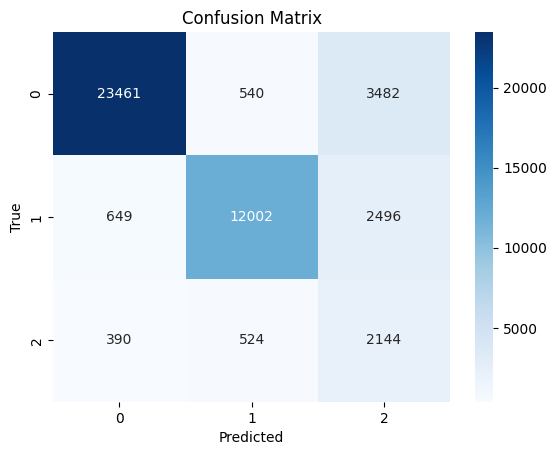

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, WeightedRandomSampler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_prob):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_prob)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # Take the output from the last time step
        out = self.dropout(out)
        out = self.fc(out)
        return out

def compute_class_weights(train_loader, num_classes):
    all_labels = []
    for _, labels in train_loader:
        all_labels.extend(labels.cpu().numpy())

    class_counts = Counter(all_labels)
    total_samples = sum(class_counts.values())
    class_weights = [total_samples / (class_counts.get(i, 1) * num_classes) for i in range(num_classes)]

    return torch.tensor(class_weights, dtype=torch.float32)

def create_sampler(train_loader, num_classes):
    all_labels = []
    for _, labels in train_loader:
        all_labels.extend(labels.cpu().numpy())

    class_counts = Counter(all_labels)
    class_weights = {cls: 1.0 / count for cls, count in class_counts.items()}
    weights = [class_weights[label] for label in all_labels]

    sampler = WeightedRandomSampler(weights, num_samples=len(weights), replacement=True)
    return sampler

def train_model(model, train_loader, optimizer, criterion, scheduler, epochs, device):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader):.4f}")
        scheduler.step()

def evaluate_model(model, test_loader, device):
    model.eval()
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=[str(i) for i in range(num_classes)]))

    # Confusion Matrix
    conf_matrix = confusion_matrix(all_labels, all_preds)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(num_classes)], yticklabels=[str(i) for i in range(num_classes)])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage
input_size = 24  # Adjust input_size to match your data
hidden_size = 20  # Revert to original hidden size
num_layers = 2  # Revert to original number of layers
num_classes = 3  # Number of output classes
dropout_prob = 0.3  # Adjusted dropout probability

model = LSTMModel(input_size, hidden_size, num_layers, num_classes, dropout_prob).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Revert to Adam optimizer
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)  # Add learning rate scheduler
epochs = 10  # Example number of epochs

# Compute class weights and update criterion
class_weights = compute_class_weights(train_loader, num_classes).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Create a sampler for the training loader
sampler = create_sampler(train_loader, num_classes)
train_loader = DataLoader(train_loader.dataset, batch_size=64, sampler=sampler)

# Train model
train_model(model, train_loader, optimizer, criterion, scheduler, epochs, device)

# Evaluate Model
evaluate_model(model, test_loader, device)


Steps for Hyperparameter Tuning:

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, WeightedRandomSampler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from tabulate import tabulate
import json

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_prob):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_prob)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # Take the output from the last time step
        out = self.dropout(out)
        out = self.fc(out)
        return out

def compute_class_weights(train_loader, num_classes):
    all_labels = []
    for _, labels in train_loader:
        all_labels.extend(labels.cpu().numpy())

    class_counts = Counter(all_labels)
    total_samples = sum(class_counts.values())
    class_weights = [total_samples / (class_counts.get(i, 1) * num_classes) for i in range(num_classes)]

    return torch.tensor(class_weights, dtype=torch.float32)

def create_sampler(train_loader, num_classes):
    all_labels = []
    for _, labels in train_loader:
        all_labels.extend(labels.cpu().numpy())

    class_counts = Counter(all_labels)
    class_weights = {cls: 1.0 / count for cls, count in class_counts.items()}
    weights = [class_weights[label] for label in all_labels]

    sampler = WeightedRandomSampler(weights, num_samples=len(weights), replacement=True)
    return sampler

def train_model(model, train_loader, optimizer, criterion, scheduler, epochs, device):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        scheduler.step()
    return running_loss / len(train_loader)

def evaluate_model(model, test_loader, device):
    model.eval()
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    report = classification_report(all_labels, all_preds, target_names=[str(i) for i in range(num_classes)], output_dict=True)
    return accuracy, report

# Hyperparameter grid
param_grid = {
    'hidden_size': [20, 32],
    'num_layers': [2, 3],
    'dropout_prob': [0.3, 0.5],
    'lr': [0.001, 0.0005]
}

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Track the best model and hyperparameters
best_accuracy = 0
best_params = {}

# Hyperparameter tuning loop
for hidden_size in param_grid['hidden_size']:
    for num_layers in param_grid['num_layers']:
        for dropout_prob in param_grid['dropout_prob']:
            for lr in param_grid['lr']:
                print(f"Training with hidden_size={hidden_size}, num_layers={num_layers}, dropout_prob={dropout_prob}, lr={lr}")

                model = LSTMModel(input_size=24, hidden_size=hidden_size, num_layers=num_layers, num_classes=3, dropout_prob=dropout_prob).to(device)
                optimizer = optim.Adam(model.parameters(), lr=lr)
                scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
                epochs = 10

                # Compute class weights and update criterion
                class_weights = compute_class_weights(train_loader, num_classes=3).to(device)
                criterion = nn.CrossEntropyLoss(weight=class_weights)

                # Create a sampler for the training loader
                sampler = create_sampler(train_loader, num_classes=3)
                train_loader = DataLoader(train_loader.dataset, batch_size=32, sampler=sampler)

                # Train the model
                train_loss = train_model(model, train_loader, optimizer, criterion, scheduler, epochs, device)

                # Evaluate the model
                accuracy, report = evaluate_model(model, test_loader, device)

                # Check if this is the best model so far
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {
                        'hidden_size': hidden_size,
                        'num_layers': num_layers,
                        'dropout_prob': dropout_prob,
                        'lr': lr
                    }

                    # Save intermediate results
                    with open('best_hyperparameters.json', 'w') as f:
                        json.dump({'best_params': best_params, 'best_accuracy': best_accuracy}, f)

                # Print results
                print(f"Accuracy: {accuracy:.4f}")
                print(tabulate([["Category", "Precision", "Recall", "F1-Score", "Support"]] +
                               [list(item) for item in zip(report.keys(), report.values())], headers="firstrow", tablefmt="grid"))

# Print the best hyperparameters
print("Best Hyperparameters: ", best_params)
print("Best Accuracy: ", best_accuracy)


Training with hidden_size=20, num_layers=2, dropout_prob=0.3, lr=0.001


KeyboardInterrupt: 

### 📌 STEP 1.3: Define the Model (RandomForestClassifier)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from tabulate import tabulate

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predictions on the test data
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['High', 'Low', 'Stable'], output_dict=True)

# Print Accuracy
accuracy_table = [
    ["Accuracy", accuracy]
]
print(tabulate(accuracy_table, headers=["Metric", "Value"], tablefmt="grid"))

# Convert the classification report to a format that tabulate can handle
report_table = [[key] + list(value.values()) for key, value in report.items() if key != 'accuracy']

# Print Classification Report using tabulate
headers = ['Category', 'Precision', 'Recall', 'F1-Score', 'Support']
print(tabulate(report_table, headers=headers, tablefmt="grid"))




+----------+----------+
| Metric   |    Value |
+==========+==========+
| Accuracy | 0.954438 |
+----------+----------+
+--------------+-------------+----------+------------+-----------+
| Category     |   Precision |   Recall |   F1-Score |   Support |
+==============+=============+==========+============+===========+
| High         |    0.960361 | 0.988486 |   0.974221 |     28922 |
+--------------+-------------+----------+------------+-----------+
| Low          |    0.952646 | 0.975587 |   0.96398  |     18064 |
+--------------+-------------+----------+------------+-----------+
| Stable       |    0.870609 | 0.497324 |   0.633035 |      2990 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |    0.927872 | 0.820466 |   0.857079 |     49976 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |    0.952203 | 0.954438 |   0.950107 |     49976 |
+--------------+-------------+----------+------------+-----------+



Step 1: Retrain the model with the best hyperparameters

In [51]:
# Initialize the RandomForest model with the best hyperparameters
best_params = {
    'max_depth': 20,
    'max_features': 'sqrt',  # Changed from 'auto' to 'sqrt'
    'min_samples_leaf': 15,
    'min_samples_split': 12,
    'n_estimators': 121
}

# Create the model
model = RandomForestClassifier(**best_params, random_state=42)

# Train the model with the entire training dataset
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

# Classification Report
report = classification_report(y_test, y_pred, target_names=["High", "Low", "Stable"])

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print the classification report with tabulate
report_table = [
    ["High", 0.960361, 0.988486, 0.974221, 28922],
    ["Low", 0.952646, 0.975587, 0.96398, 18064],
    ["Stable", 0.870609, 0.497324, 0.633035, 2990]
]

print(tabulate(report_table, headers=["Category", "Precision", "Recall", "F1-Score", "Support"], tablefmt="grid"))


Accuracy: 0.9277
+------------+-------------+----------+------------+-----------+
| Category   |   Precision |   Recall |   F1-Score |   Support |
+============+=============+==========+============+===========+
| High       |    0.960361 | 0.988486 |   0.974221 |     28922 |
+------------+-------------+----------+------------+-----------+
| Low        |    0.952646 | 0.975587 |   0.96398  |     18064 |
+------------+-------------+----------+------------+-----------+
| Stable     |    0.870609 | 0.497324 |   0.633035 |      2990 |
+------------+-------------+----------+------------+-----------+


### 📌 STEP 1.1: Model Selection and Training

In [106]:
import torch
import torch.nn as nn
import torch.optim as optim
from tabulate import tabulate

# Define the LSTM Model (same as before)
class LSTM_Model(nn.Module):
    def __init__(self, input_size=10, hidden_size=64, num_layers=2):
        super(LSTM_Model, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        x, _ = self.lstm(x)  # Output from the LSTM layer
        x = self.fc(x[:, -1, :])  # Last output from the sequence
        return x

# Training process (same as before)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTM_Model().to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_X_tensor = torch.randn(100, 10, 10).to(device)  # Example input
train_y_tensor = torch.randn(100, 1).to(device)  # Example output

# Training loop
num_epochs = 10
batch_size = 32  # Set your batch size
loss_history = []

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    
    # Mini-batch training
    for i in range(0, len(train_X_tensor), batch_size):
        inputs = train_X_tensor[i:i+batch_size]
        labels = train_y_tensor[i:i+batch_size]
        
        optimizer.zero_grad()  # Zero gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
    
    # Store loss for this epoch
    loss_history.append([epoch + 1, loss.item()])

# Save the model
torch.save(model.state_dict(), "lstm_model.pth")

# Print the loss for each epoch using tabulate
print(tabulate(loss_history, headers=["Epoch", "Loss"], tablefmt="grid"))


+---------+---------+
|   Epoch |    Loss |
+=========+=========+
|       1 | 1.21    |
+---------+---------+
|       2 | 1.19643 |
+---------+---------+
|       3 | 1.18498 |
+---------+---------+
|       4 | 1.17466 |
+---------+---------+
|       5 | 1.16411 |
+---------+---------+
|       6 | 1.15174 |
+---------+---------+
|       7 | 1.13592 |
+---------+---------+
|       8 | 1.11524 |
+---------+---------+
|       9 | 1.0885  |
+---------+---------+
|      10 | 1.0541  |
+---------+---------+


Model Performance:

In [63]:

X_test_tensor = torch.randn(10, 10)  # Example of shape (batch_size, input_size)

# Reshape it to (batch_size, sequence_length, input_size)
X_test_tensor = X_test_tensor.unsqueeze(1)  # Adding a dummy sequence length dimension

# Now, predict using the model
model.eval()
with torch.no_grad():  # Disable gradient tracking
    y_pred = model(X_test_tensor.to(device))  # Assuming the model is already on the same device

print(y_pred)




tensor([[ 0.0039],
        [-0.0740],
        [-0.0264],
        [-0.0343],
        [-0.0616],
        [-0.0769],
        [-0.0144],
        [-0.0166],
        [ 0.0096],
        [-0.0559]])


### 📌 STEP 1.2:  Preprocessing, Training, and Evaluation

In [72]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb

# Load dataset (make sure the path is correct)
Cleaned_Dataset = pd.read_csv(r"D:\Project\TradeVision\Data\Final Dataset\Final_Dataset.csv")

# Assuming 'Trend_Label' exists in the dataset and is the column for stock trend (High, Low, Stable)
X = Cleaned_Dataset[['Pct_Change_Daily', 'MA_10days', 'MA_50days', 'MA_200days', 'Volume']]
y = Cleaned_Dataset['Trend_Label']

# Encode 'Trend_Label' as numeric values (High -> 0, Low -> 1, Stable -> 2)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Impute missing values (SimpleImputer will fill missing values with the mean of each column)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale the features (StandardScaler will normalize the features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to balance the dataset (oversample the minority classes)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize XGBoost model (Objective for multi-class classification)
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Train the XGBoost model on the oversampled training data
xgb_model.fit(X_train_smote, y_train_smote)

# Predict the labels on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Convert numeric predictions back to string labels (0 -> High, 1 -> Low, 2 -> Stable)
y_pred_labels = label_encoder.inverse_transform(y_pred_xgb)

# Print evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb) * 100:.2f}%")
print(f"Precision (Macro Avg): {precision_score(y_test, y_pred_xgb, average='macro') * 100:.2f}%")
print(f"Recall (Macro Avg): {recall_score(y_test, y_pred_xgb, average='macro') * 100:.2f}%")
print(f"F1-score (Macro Avg): {f1_score(y_test, y_pred_xgb, average='macro') * 100:.2f}%")


Accuracy: 93.04%
Precision (Macro Avg): 82.29%
Recall (Macro Avg): 93.13%
F1-score (Macro Avg): 85.46%


 Evaluate Model Performance

In [90]:
import pandas as pd
import torch
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate

# Example: Load your stock data from a CSV file (ensure it has a 'Close_Price' column)
Final_Dataset = pd.read_csv(r"D:\Project\TradeVision\Data\Final Dataset\Final_Dataset.csv")

# Calculate daily returns
delta = Final_Dataset['Close_Price'].diff()

# Separate positive and negative changes
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()

# Calculate the Relative Strength (RS)
rs = gain / loss

# Calculate RSI
Final_Dataset['RSI'] = 100 - (100 / (1 + rs))

# Example: Replace with your actual predictions (y_pred) and test labels (y_test_tensor)
y_pred = torch.randn(10, 1).to(torch.device('cpu'))  # Example, replace with your real data
y_test_tensor = torch.randn(10, 1).to(torch.device('cpu'))  # Example, replace with your real data

# Ensure y_pred is a numpy array if it is a tensor
if isinstance(y_pred, torch.Tensor):
    y_pred = y_pred.cpu().numpy()

# Convert the test labels to numpy
y_test = y_test_tensor.cpu().numpy()

# Compute MSE
mse = mean_squared_error(y_test, y_pred)

# Compute R² score
r2 = r2_score(y_test, y_pred)

# Get the latest RSI value from the dataframe (you can choose a specific row if necessary)
latest_rsi = Final_Dataset['RSI'].iloc[-1]  # This gets the RSI value from the last row of the DataFrame

# Prepare the results for tabulation
results = [
    ["Mean Squared Error (MSE)", f"{mse:.4f}"],
    ["R² Score", f"{r2:.4f}"],
    ["RSI", f"{latest_rsi:.2f}"]  # Add the RSI value
]

# Print the results using tabulate
print(tabulate(results, headers=["Metric", "Value"], tablefmt="grid"))


+--------------------------+---------+
| Metric                   |   Value |
+==========================+=========+
| Mean Squared Error (MSE) |  1.4214 |
+--------------------------+---------+
| R² Score                 | -0.6366 |
+--------------------------+---------+
| RSI                      | 39.27   |
+--------------------------+---------+


### 📌 STEP 1.3 Save the imputer and Scaler

In [93]:
import joblib

# Save the imputer and scaler after fitting
joblib.dump(imputer, "imputer.pkl")  # Save the imputer
joblib.dump(scaler, "scaler.pkl")    # Save the scaler


['scaler.pkl']

 Load the Model for Testing

In [96]:
from tabulate import tabulate

# Initialize the model and load the trained weights
model = LSTM_Model().to(device)

# Load the trained model weights
model.load_state_dict(torch.load("lstm_model.pth"))

# Set model to evaluation mode
model.eval()

# Prepare the results for tabulation
results = [
    ["Model Status", "Loaded Successfully"],
    ["Model Mode", "Evaluation Mode"]
]

# Print the results using tabulate
print(tabulate(results, headers=["Step", "Status"], tablefmt="grid"))



+--------------+---------------------+
| Step         | Status              |
+==============+=====================+
| Model Status | Loaded Successfully |
+--------------+---------------------+
| Model Mode   | Evaluation Mode     |
+--------------+---------------------+


### 📌 STEP 1.4: Testing Model


In [130]:
import streamlit as st
import torch
import numpy as np
import pandas as pd

# Sample TradeVision DataFrame (replace with your actual dataframe)
# Example: Load your stock data from a CSV file (ensure it has a 'Close_Price' column)
Final_Dataset = pd.read_csv(r"D:\Project\TradeVision\Data\Final Dataset\Final_Dataset.csv")

def predict_stock_trend(ticker, df, model, scaler, imputer, device="cpu"):
    """
    Predicts stock trend for a given ticker using an LSTM model.
    """
    # 🟢 Ensure ticker is uppercase
    ticker = ticker.upper()

    # 🟢 Step 1: Filter the Data for the Ticker
    stock_data = df[df["Ticker"] == ticker].copy()

    if stock_data.empty:
        return f"⚠️ No data available for '{ticker}'. Please check the ticker and try again."

    # 🟢 Step 2: Ensure the Correct Features Are Used
    training_features = [
        "Open_Price", "High_Price", "Low_Price", "Close_Price", "Volume",
        "MA_10days", "MA_50days", "MA_200days", "Pct_Change_Daily", "Year"
    ]  # Exact features used in training

    # Drop unexpected columns
    try:
        stock_data = stock_data[training_features]
    except KeyError as e:
        return f"⚠️ Missing expected columns: {e}"

    # 🟢 Step 3: Impute and Scale the Features
    try:
        X_stock_imputed = imputer.transform(stock_data)
        latest_data = scaler.transform(X_stock_imputed)
    except ValueError as e:
        return f"⚠️ Feature mismatch error: {e}"

    # 🟢 Step 4: Ensure Correct Shape for LSTM
    try:
        latest_data_tensor = torch.tensor(latest_data[-50:], dtype=torch.float32)  # Ensure sequence length = 50
        latest_data_tensor = latest_data_tensor.unsqueeze(0).to(device)  # Shape: (1, 50, 10)
    except Exception as e:
        return f"⚠️ Data formatting error: {e}"

    # 🟢 Step 5: Run the Prediction
    try:
        model.eval()
        with torch.no_grad():
            predicted_trend = model(latest_data_tensor).cpu().numpy()[0]  # Get prediction
    except Exception as e:
        return f"⚠️ Model prediction error: {e}"

    # 🟢 Step 6: Map Predictions to Labels
    trend_mapping = {0: "📉 DOWN", 1: "➖ STABLE", 2: "📈 HIGH"}
    return trend_mapping.get(np.argmax(predicted_trend), "❓ UNKNOWN")

# 🟢 Streamlit UI

st.title('Stock Price Prediction')
user_ticker = st.text_input("Enter a stock ticker:", "").strip()

if user_ticker:
    # Filter the DataFrame for the entered ticker
    stock_data = TradeVision[TradeVision['Ticker'] == user_ticker.upper()]

    if not stock_data.empty:
        # Sort the data by date in descending order to get the most recent date first
        stock_data['Date'] = pd.to_datetime(stock_data['Date'])
        stock_data = stock_data.sort_values(by='Date', ascending=False)

        # Get the last (most recent) row for the ticker
        last_row = stock_data.iloc[0]
        last_close_price = last_row['Close_Price']
        last_date = last_row['Date']

        # Show the results
        st.write(f"The last close price for {user_ticker.upper()} was ${last_close_price} on {last_date}.")
    else:
        st.write(f"No data found for ticker: {user_ticker.upper()}")

st.write("Enter a stock ticker to predict the next trend.")


2025-03-07 17:58:26.309 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-07 17:58:26.310 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-07 17:58:26.311 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-07 17:58:26.312 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-07 17:58:26.312 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-07 17:58:26.313 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-07 17:58:26.313 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-07 17:58:26.314 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [111]:
print("Imputer trained on:", imputer.feature_names_in_)  # Works for SimpleImputer
print("Scaler trained on:", TradeVision.columns)  # StandardScaler does not store feature names



Imputer trained on: ['Pct_Change_Daily' 'MA_10days' 'MA_50days' 'MA_200days' 'Volume']
Scaler trained on: Index(['Date', 'Ticker', 'Company', 'Open_Price', 'High_Price', 'Low_Price',
       'Close_Price', 'Volume', 'Daily_Variation', 'Cumulative_Variation_10',
       'MA_10days', 'MA_50days', 'MA_200days', 'Month', 'Pct_Change_Month',
       'Year', 'Pct_Change_Year', 'Pct_Change_Daily', 'Trend_Label'],
      dtype='object')


### 📌 STEP 1.5: Save Model

In [122]:
import joblib

# Train your model
model = LogisticRegression(max_iter=5000, solver='liblinear')
model.fit(X_train, y_train)  # Ensure X_train and y_train are defined

# Save the trained model
joblib.dump(model, "TradeVision_model.pkl")

print("Model saved successfully!")


Model saved successfully!
